In [1]:
from IPython.display import HTML
HTML(filename='/Users/hubatsl/Desktop/SPT/Us/SPT/Python/hide_code.html')

# Off Rate Parameter Sampling

In order to test changes made to off rate fitting this document can serve as a standard. Here, off-rate data is simulated for various parameter combinations, fits are performed and the resulting parameter space sweep is analysed.

In [9]:
import glob
from ipywidgets import interact, FloatSlider
from matplotlib import pyplot as plt
import numpy
import os
import pandas as pd
import sys
import time
# Add path to python modules
sys.path.append(os.getcwd()[0:-7]+'src/') 
from MovieTracks import ParameterSampler
%matplotlib inline

In [10]:
#Get noise value
noise = numpy.array([0.1])
#For each noise value run the following param combinations
offRate = numpy.arange(0.01, 0.02, 0.01)
kOn = numpy.arange(100, 200, 100)
kPh = numpy.arange(0.01, 0.02, 0.01)
#Do the sampling
p = ParameterSampler(offRate, kPh, kOn, noise, '1')

**Analyse Cluster Output**

In [11]:

#Concatenate all input/output files into one Pandas frame
allFilesIn = glob.glob("/Users/hubatsl/Desktop/SPT/Us/SPT/Python/offRate_Simulation_16_10_16/" 
                       + "/in*.csv")
df_from_each_file = (pd.read_csv(f) for f in allFilesIn)
concatenated_dfIn   = pd.concat(df_from_each_file, ignore_index=True)
allFilesOut = glob.glob("/Users/hubatsl/Desktop/SPT/Us/SPT/Python/offRate_Simulation_16_10_16/" 
                        + "/out*.csv")
df_from_each_file = (pd.read_csv(f) for f in allFilesOut)
concatenated_dfOut   = pd.concat(df_from_each_file, ignore_index=True)

# Calculate errors for each method by dividing the fitted off rate by 
# the true input
# Get Off Rates and Bleaching rates in seperate dataframes
dfOffRate = concatenated_dfOut[['kOffVar1', 'kOffVar2', 'kOffVar3', 'kOffVar4', 'kOffVar5', 'kOffVar6']]
dfPhRate = concatenated_dfOut[['kPhVar1', 'kPhVar5', 'kPhVar6']]
dfOffRateErr = (dfOffRate.T/concatenated_dfIn.values[:, 1]).T
dfPhRateErr = (dfPhRate.T/concatenated_dfIn.values[:, 2]).T

In [12]:
# dfPhRate.ix[(dfPhRateErr.kPhVar1>10)]
idx = 57809
print(concatenated_dfOut.ix[idx])
print(dfPhRateErr.ix[idx])
print(concatenated_dfIn.ix[idx, :])

Unnamed: 0      0.000000
kOffVar1      715.407863
kOffVar2        0.000163
kOffVar3        0.000688
kOffVar4       -0.000135
kOffVar5       28.524936
kOffVar6        0.000224
kPhVar1       237.121428
kPhVar5        -3.879203
kPhVar6         0.000359
kOnVar5        -0.001493
kOnVar6         0.000138
Name: 57809, dtype: float64
kPhVar1    474242.855010
kPhVar5     -7758.405965
kPhVar6         0.717175
Name: 57809, dtype: float64
Unnamed: 0      0.0000
kOff            0.0005
kPh             0.0005
kOn           600.0000
noise           1.0000
Name: 57809, dtype: float64


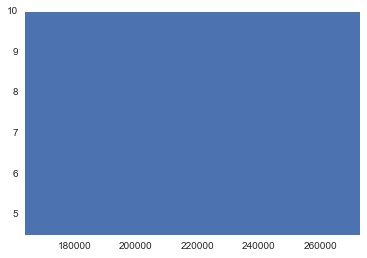

In [ ]:
x_min_widget = FloatSlider(min=0.0, max=600000.0, step=1000)
x_max_widget = FloatSlider(min=0.0, max=600000.0, step=1000)
y_min_widget = FloatSlider(min=-10, max=10, step=0.5)
y_max_widget = FloatSlider(min=-10, max=10, step=0.5)

def plotErrXmax(xmin, xmax, ymin, ymax):
    plt.plot(dfOffRateErr.kOffVar6)
    plt.xlim((xmin, xmax))
    plt.ylim((ymin, ymax))
    plt.show()

interact(plotErrXmax, xmin=x_min_widget, xmax=x_max_widget, ymin=y_min_widget, ymax=y_max_widget)